## Vision-Python Demonstration Workbook

*Objective*: To find the correlation between factors that influece mood and productivity


In [11]:
import pandas as pd
import vconnect

vc = vconnect.VCconnection()
vc.setUrl('http://visdevdb01.cts.fast-clientenv-aws.dev.us-east-1.aws.fdscloud.io:10010/vision/api')

## Running Basic Vision Expressions

The function *vc.runvision* is used to execute a Vision expression supplied as a string parameter, returning text.


In [4]:
#-- As basic as you can get
vc.runvision('2+2')

'     4.00\n'

In [67]:
vcode = '''
####################
#  Calculates the correlation among various states and presents data for further
#     analysis in python
####################


#--------------------
#  Create Person class and associated MoodDataRecord
#--------------------

ClassSetup updateFromString: "ClassID | ParentID | Description

#--  Entity
Person | Entity | This class represents people who have moods

#--  DataRecord
MoodData | DataRecord | This class stores different mood factors
" ;

PropertySetup updateFromString:
"classId | property | tsFlag | dataType | defaultValue  | description

Person | moodData | Y | MoodData | MoodData  | moods over time

MoodData | foggyFactor | N | Double | 0 | Higher number indicates foggier
MoodData | grumpyFactor | N | Double | 0  | Higher number indicates grumpier
" ;

#--  Feed Setup
MasterFeedSetup updateFromString: "feedId | entityId
PersonMaster | Person
" ;

EntityExtenderFeedSetup updateFromString: "feedId | baseClassId | baseEntityId
MoodDataFeed | MoodData | Person
" ;

#--------------------
#  Calculation Methods
#--------------------

MoodData defineMethod: [ | ff | foggyFactor ] ;
MoodData defineMethod: [ | gf | grumpyFactor ] ;

MoodData defineMethod: [ | productivityFactor |
  100 - ( ff + gf ) / 2
] ;


#--------------------
#  Sample Data
#--------------------

PersonMaster updateFromString: "id | name
TLH | Tori
LCN | Leslie
MJC | Mikey
DD | D-Duck
" ;
'''
print (vc.runvision(vcode))



                    ---  Begin Reconcile for ClassSetup  ---                    

  Upload Feed:   ClassSetup
  Total Records:         2
  Bad Field Ids:         0
  Not Processed:         0
  Other Status:          2

        2 new subclasses created. 
MoodData DataRecord ( 7 )This class stores different mood factors
Person Entity This class represents people who have moods


                     ---  End Reconcile for ClassSetup  ---                     





                  ---  Begin Reconcile for PropertySetup  ---                   

  Upload Feed:   PropertySetup
  Total Records:         3
  Bad Field Ids:         0
  Not Processed:         0
  Other Status:          3

        3 new properties created. 
MoodData foggyFactor (FP ) Double 0  Higher number indicates foggier
MoodData grumpyFactor (FP ) Double 0  Higher number indicates grumpier
Person moodData (TS) MoodData MoodData  moods over time


                   ---  End Reconcile for PropertySetup  ---                 

In [68]:
vcode = '''
!base <- Account findId: "Sp50" ;
!id <- "tlh" ;
!dr <- 20200101 to: ^today by: 1 days ;

MoodDataFeed updateFromString:
[
   Interface Global setDelimiterTo: " | " ;
   Interface runExpression: [
   "id" print ; "date" print ; "foggyFactor" print ; "grumpyFactor" printNL ;
   dr evaluate: [
   !hold <- base holdings numberElements ;
   !seed1 <- hold  at: (^date day mod: hold count) ;
   !seed2 <- hold at: (^date day increment: ^date month . mod: hold count) ;
   id print ; ^date asInteger print ;
   (seed1 percentOfPort * 100 ) asInteger mod: 100 . print ;
   (seed2 mapEntry factset price asInteger mod: 100 ) print ;
   newLine print ;
   ] ; #-- date evalu
 ] ;   #-- runExpress

] divertOutput ;

Person findId: "tlh" . :moodData
do: [ ^date print: 15 ; ff print ; gf print ; productivityFactor printNL ] ;

"-" fill: 50 . printNL ;

!base <- Account findId: "sml" ;
!id <- "lcn" ;
!dr <- 20200101 to: ^today by: 1 days ;

MoodDataFeed updateFromString:
[
   Interface Global setDelimiterTo: " | " ;
   Interface runExpression: [
   "id" print ; "date" print ; "foggyFactor" print ; "grumpyFactor" printNL ;
   dr evaluate: [
   !hold <- base holdings numberElements ;
   !seed1 <- hold  at: (^date day mod: hold count) ;
   !seed2 <- hold at: (^date day increment: ^date month . mod: hold count) ;
   id print ; ^date asInteger print ;
   (seed1 percentOfPort * 100 ) asInteger mod: 100 . print ;
   (seed2 mapEntry factset price asInteger mod: 100 ) print ;
   newLine print ;
   ] ; #-- date evalu
 ] ;   #-- runExpress

] divertOutput ;

Person findId: "lcn" . :moodData
do: [ ^date print: 15 ; ff print ; gf print ; productivityFactor printNL ] ;
'''
print (vc.runvision(vcode))



                   ---  Begin Reconcile for MoodDataFeed  ---                   

  Upload Feed:   MoodDataFeed
  Total Records:       436
  Bad Field Ids:         0
  Not Processed:         0
  Other Status:          0


                    ---  End Reconcile for MoodDataFeed  ---                    



01/01/1             0.00     0.00   100.00
01/01/2020         14.00    19.00    83.50
01/02/2020          4.00    88.00    54.00
01/03/2020         21.00    39.00    70.00
01/04/2020          6.00    85.00    54.50
01/05/2020         56.00    58.00    43.00
01/06/2020         17.00    33.00    75.00
01/07/2020         60.00    54.00    43.00
01/08/2020          3.00    47.00    75.00
01/09/2020         20.00    87.00    46.50
01/10/2020         10.00    32.00    79.00
01/11/2020         18.00    93.00    44.50
01/12/2020          5.00    65.00    65.00
01/13/2020          2.00    75.00    61.50
01/14/2020          3.00    60.00    68.50
01/15/2020          6.00    74.00    60.00
01/1

In [69]:
vcode = '''
JS getArrayFrom: [ Person findId: "tlh" . extendBy: [ !label <- moodData date formatUsingMMDD]]
   for: "moodData ff, moodData gf, moodData productivityFactor, label"
   over: (^today - 1 days to: ^today - 10 days by: 1 days)
'''
result = vc.runvisionJSON(vcode)
pd.DataFrame(result['array'])

,date,id,label,moodData ff,moodData gf,moodData productivityFactor
0,20210310,TLH,03/10,11,66,61.5
1,20210309,TLH,03/09,28,97,37.5
2,20210308,TLH,03/08,3,66,65.5
3,20210307,TLH,03/07,65,16,59.5
4,20210306,TLH,03/06,22,78,50.0
5,20210305,TLH,03/05,64,71,32.5
6,20210304,TLH,03/04,64,39,48.5
7,20210303,TLH,03/03,22,93,42.5
8,20210302,TLH,03/02,5,22,86.5
9,20210301,TLH,03/01,9,28,81.5


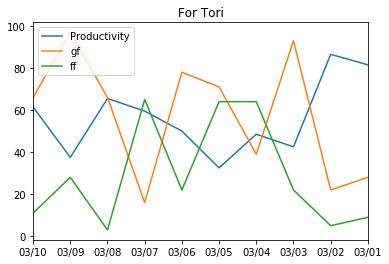

In [70]:
data = result['array']
labels = [x['label'] for x in data]
ff = [x['moodData ff'] for x in data ] 
gf = [x['moodData gf'] for x in data ]
p = [x['moodData productivityFactor'] for x in data]
title = "For Tori"

df = pd.DataFrame({'Productivity' :p, 'gf' : gf, 'ff': ff}, index=labels)
myplot = df.plot.line(title = "For Tori")
myplot

In [71]:
vcode = '''
Applay Lib defineMethod: [ | ShowMood |
!id <- ^self getParam: "id" ;

!who <- GlobalWorkspace Person findId: id ;
who isntDefault
ifTrue:
  [
    ^self responseObject
        set: "id" to: who id .
        set: "name" to: who name .
       ;
     !data <- who :moodData nonDefaults
       send: [ ^my getNewObject
                  set: "date" to: date formatUsingMMDD .
                  set: "productivity" to: productivityFactor .
                  set: "fog" to: foggyFactor .
                  set: "grump" to: grumpyFactor .
                ] ;
    ^self responseObject
         set: "data" to: (^self getNewArrayFrom: data);
    ^self updateStatusWithSuccess ;
    ]
ifFalse:
   [ ^self postErrorWithMessage: ("Id " concat: id . concat: " not found.")
   ] ;

^self
] ;
'''
vc.runvision(vcode)

''

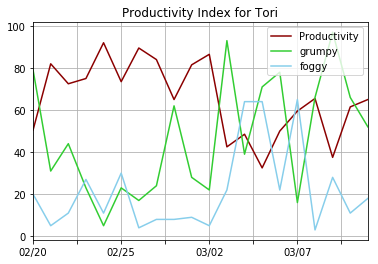

In [93]:
result = vc.runapp('ShowMood', {'id' : 'tlh'})
#print (result)

data = result['response']['data']
labels = [x['date'] for x in data]
ff = [x['fog'] for x in data ] 
gf = [x['grump'] for x in data ]
p = [x['productivity'] for x in data]
title = "Productivity Index for " + result['response']['name']

df = pd.DataFrame({'Productivity' :p, 'grumpy' : gf, 'foggy': ff}, index=labels).tail(20)
myplot = df.plot.line(title = title, grid=1,color = ['darkred', 'limegreen', 'skyblue'])
myplot